In [12]:
cd("$(homedir())/OneDrive/Documents/GitHub/enso_project.jl")

In [15]:
using Pkg
Pkg.activate(".")
Pkg.add(["DynamicalSystems", "DelimitedFiles"])

  Activating project at `C:\Users\Andrea\OneDrive\Documents\GitHub\enso_project.jl`
   Resolving package versions...
      Compat entries added for 
  No Changes to `C:\Users\Andrea\OneDrive\Documents\GitHub\enso_project.jl\Project.toml`
  No Changes to `C:\Users\Andrea\OneDrive\Documents\GitHub\enso_project.jl\Manifest.toml`


In [16]:
using DataFrames, CSV, Plots, Dates, DynamicalSystems, DelimitedFiles

### 1D Time Series: SOI

In [3]:
soi_1D = CSV.read("c:/Users/Andrea/OneDrive/Documents/GitHub/enso_project.jl/data/soi_standardized_format.csv", DataFrame)

Row,DATE,SOI
,Date,Float64
1,1951-01-01,1.5
2,1951-02-01,0.9
3,1951-03-01,-0.1
4,1951-04-01,-0.3
5,1951-05-01,-0.7
6,1951-06-01,0.2
7,1951-07-01,-1.0
8,1951-08-01,-0.2
9,1951-09-01,-1.1


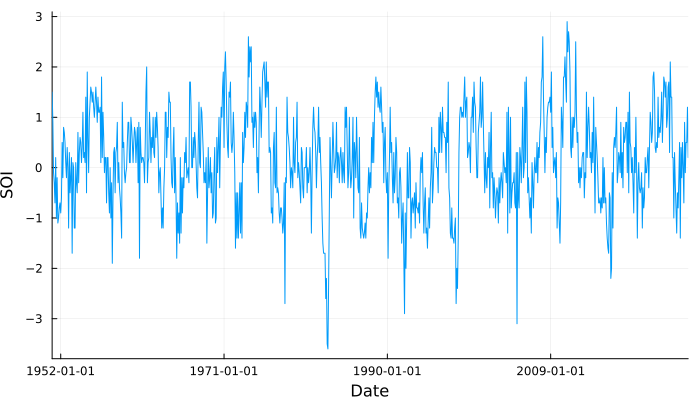

In [4]:
xs = soi_1D[:,"DATE"]
ys = soi_1D[:, "SOI"]
plot(xs, ys, xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "SOI", legend = false, size = (700,400))

### Time Delay Embedding

In [19]:
D, τ, E = optimal_separated_de(ys) 

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.
Stochastic signal, valid embedding NOT achieved ⨉.


(7-dimensional StateSpaceSet{Float64} with 871 points, 3, [NaN, NaN, NaN, 0.0, 0.778945910990251, 0.8727311746115006, 0.9228006297690786, 0.950127461455743, 0.9597241041516414, 0.9653962363564975])

with default settings the stochastic test turned out to be true suggesting that the time series is contaminated with noise

In [20]:
# adjust default stoch_thres=0.1 (or fnn_thres=0.05 if not default afnn method is used) according to the noise level
D, τ, E = optimal_separated_de(ys, stoch_thres = 0.08)

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


(7-dimensional StateSpaceSet{Float64} with 871 points, 3, [NaN, NaN, NaN, 0.0, 0.778945910990251, 0.8727311746115006, 0.9228006297690786, 0.950127461455743, 0.9597241041516414, 0.9653962363564975])

by changing the stochastic threshold slightly, the stochastic test turns out to be false

In [21]:
D

7-dimensional StateSpaceSet{Float64} with 871 points
  1.5  -0.3  -1.0  -1.0  -0.9  -0.2   0.5
  0.9  -0.7  -0.2  -0.8  -0.6   0.8   0.1
 -0.1   0.2  -1.1  -0.7   0.5   0.7  -0.2
 -0.3  -1.0  -1.0  -0.9  -0.2   0.5   0.4
 -0.7  -0.2  -0.8  -0.6   0.8   0.1   0.0
  0.2  -1.1  -0.7   0.5   0.7  -0.2  -1.2
 -1.0  -1.0  -0.9  -0.2   0.5   0.4   0.3
 -0.2  -0.8  -0.6   0.8   0.1   0.0  -0.5
 -1.1  -0.7   0.5   0.7  -0.2  -1.2  -0.2
 -1.0  -0.9  -0.2   0.5   0.4   0.3   0.2
  ⋮                             ⋮    
  0.3   1.4  -1.0  -0.8  -0.8  -1.4   0.5
  2.1   0.2   0.3  -1.3  -0.2   0.4   0.0
  1.4   0.2  -0.3  -0.5   0.5  -0.2  -0.7
  1.4  -1.0  -0.8  -0.8  -1.4   0.5   0.9
  0.2   0.3  -1.3  -0.2   0.4   0.0  -0.1
  0.2  -0.3  -0.5   0.5  -0.2  -0.7   0.5
 -1.0  -0.8  -0.8  -1.4   0.5   0.9   0.5
  0.3  -1.3  -0.2   0.4   0.0  -0.1   1.2
 -0.3  -0.5   0.5  -0.2  -0.7   0.5   0.2

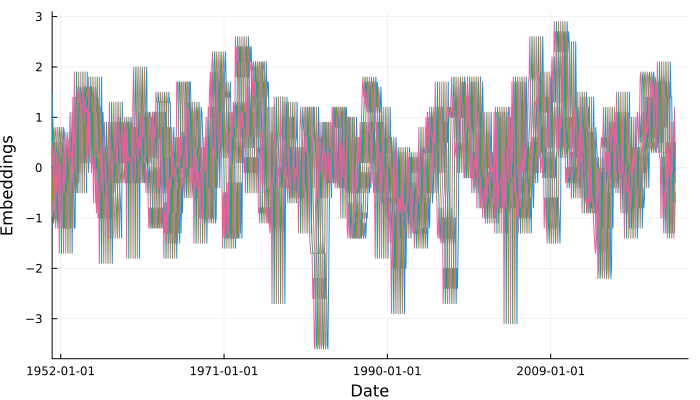

In [22]:
plot(xs[1:871], [D[:,1] D[:,2] D[:,3] D[:,4] D[:,5] D[:,6] D[:,7]], xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "Embeddings", legend = false, size = (700,400))

try out different delay estimation methods

In [24]:
D, τ, E = optimal_traditional_de(ys, "afnn", "ac_zero") 

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


(6-dimensional StateSpaceSet{Float64} with 829 points, 12, [NaN, NaN, NaN, 0.0, 0.8088340727581846, 0.8592100933242863, 0.8994303482056972, 0.9326890188910195, 0.9349961979151105, 0.9618764678927767])

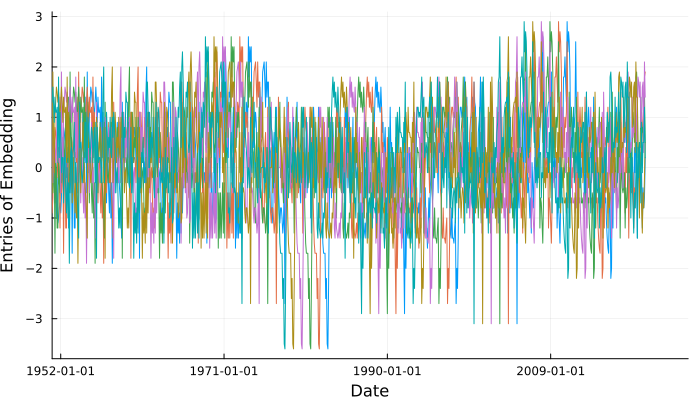

In [26]:
plot(xs[1:829], [D[:,1] D[:,2] D[:,3] D[:,4] D[:,5] D[:,6]], xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "Entries of Embedding", legend = false, size = (700,400))

In [27]:
D, τ, E = optimal_traditional_de(ys, "afnn", "ac_min") 

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.
Stochastic signal, valid embedding NOT achieved ⨉.


(6-dimensional StateSpaceSet{Float64} with 819 points, 14, [NaN, NaN, 0.0, 0.6875909053051653, 0.7987232801104818, 0.8668941691369705, 0.895849679746896, 0.9318457824937768, 0.9651035125922617, 0.9694557941816282])

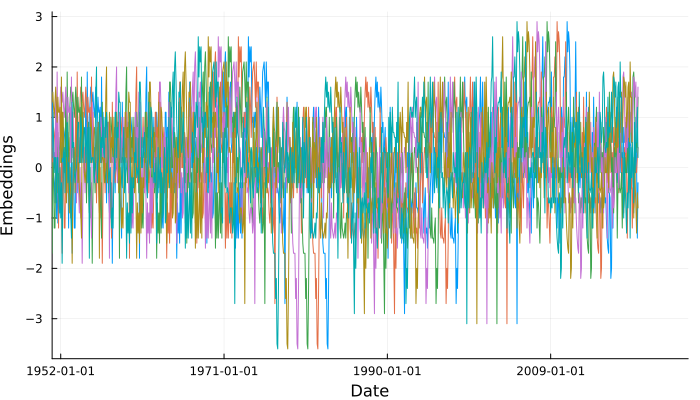

In [28]:
plot(xs[1:819], [D[:,1] D[:,2] D[:,3] D[:,4] D[:,5] D[:,6]], xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "Embeddings", legend = false, size = (700,400))

In [29]:
D, τ, E = optimal_traditional_de(ys, "afnn", "exp_extrema") 

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.
Stochastic signal, valid embedding NOT achieved ⨉.


(6-dimensional StateSpaceSet{Float64} with 644 points, 49, [NaN, NaN, 0.0, 0.6596906069465286, 0.8100931564893646, 0.8854814113864644, 0.8721159303755208, 0.941357358266402, 0.9691448821326153, 0.9800894210249638])

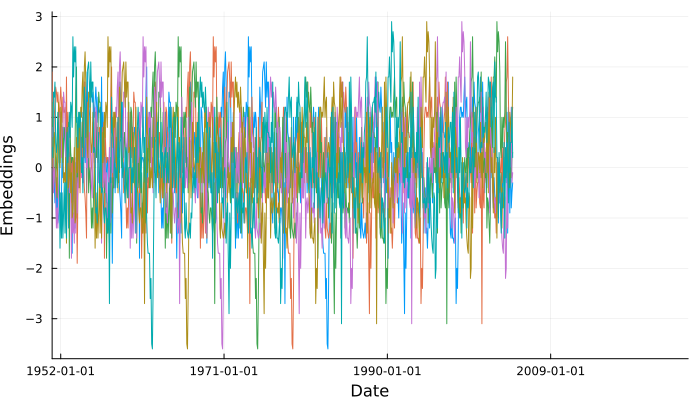

In [30]:
plot(xs[1:644], [D[:,1] D[:,2] D[:,3] D[:,4] D[:,5] D[:,6]], xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "Embeddings", legend = false, size = (700,400))

Observations consistent with theory: 
1. each dimension of the embedded system corresponds to a shift of the original one-dimensional time series, with shifts equal to multiples of the delay
2. the higher the delay, the shorter the embedded system's multidimensional time series

### 1D Time Series: SST of region 3.4

In [3]:
sst_1D = CSV.read("c:/Users/Andrea/OneDrive/Documents/GitHub/enso_project.jl/data/sst_34_format.csv", DataFrame)

Row,DATE,NINO3.4,ANOM_3
,Date,Float64,Float64
1,1982-01-01,26.65,0.08
2,1982-02-01,26.54,-0.2
3,1982-03-01,27.09,-0.14
4,1982-04-01,27.83,0.02
5,1982-05-01,28.37,0.49
6,1982-06-01,28.35,0.65
7,1982-07-01,27.57,0.27
8,1982-08-01,27.76,0.86
9,1982-09-01,28.01,1.24


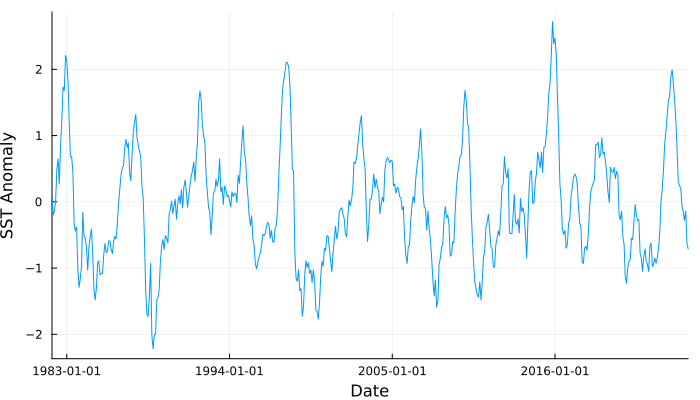

In [5]:
xs = sst_1D[:,"DATE"]
ys = sst_1D[:, "ANOM_3"]
plot(xs, ys, xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "SST Anomaly", legend = false, size = (700,400))

SST time series data shows less noisy dynamics than SOI time series data

### Time Delay Embedding

In [6]:
D, τ, E = optimal_separated_de(ys) 

Algorithm stopped due to convergence of E₁-statistic. Valid embedding achieved ✓.


(5-dimensional StateSpaceSet{Float64} with 493 points, 6, [NaN, 0.0, 0.5165545947228343, 0.7441899855163822, 0.8154499159297203, 0.8334624951006728, 0.9248066421787883, 0.9702805835165235, 0.9662553441805566, 0.9880167838554348])

valid embedding achieved without sign of stochasticity and number of embedding dimensions is lower than for SOI

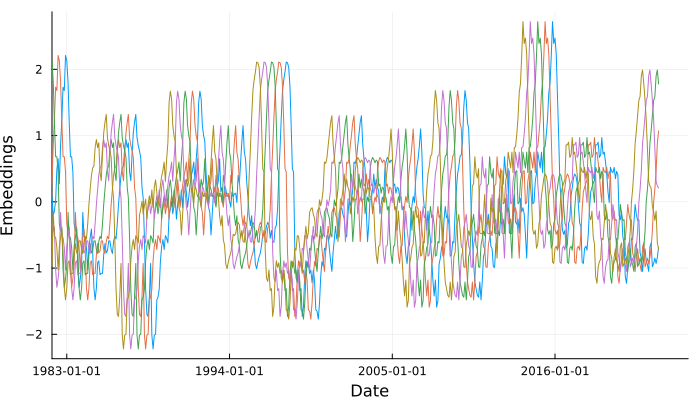

In [7]:
plot(xs[1:493], [D[:,1] D[:,2] D[:,3] D[:,4] D[:,5]], xlabel = "Date", xlims = (xs[1],xs[end]), ylabel = "Embeddings", legend = false, size = (700,400))

Choice of method and data:
1. method includes test for stochasticity (Chao's AFNN) 
2. valid embedding is achieved with no sign of stochasticity
3. lowest number of embedding dimensions

In [17]:
# Save embedded multivariate time series
writedlm("c:/Users/Andrea/OneDrive/Documents/GitHub/enso_project.jl/data/sst_34_anomaly_embedded.txt", D, ',')